# Introdução ao estudo

Neste trabalho irei fazer um análise exploratória de dados de dados utilizando de Data Visualization e pandas. O Dataset foi disponibilizado no curso de Data Visualization: Explorando com Seaborn da Alura. Este projeto se trata de dados de um restaurante fictício com 6 variáveis e 3416 registros Analisarei os dados gerando diversos tipos de gráficos através da biblioteca Seaborn, além de trabalhar as variáveis de maneira descritiva, usando de um procedimento estatístico para tomada de decisão, chamado de teste de hipótese. Espero que goste desse estudo.

# Importando as bibliotecas

In [1]:
import pandas as pd #Tratamento dos dados
import seaborn as sns #DataViz
import matplotlib.pyplot as plt #DataViz
from scipy.stats import ranksums #Teste de hipótese
%matplotlib inline


# Lendo e visualizando os restaurante

In [2]:
restaurante = pd.read_csv('tips_atualizado.csv')
restaurante.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

## Trocando os nomes das colunas para melhor entendimento

In [5]:
restaurante.columns=['valor_da_conta','gorjeta','sobremesa','dia',
               'hora_do_dia','total_de_pessoas']
restaurante.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Trocando os valores das colunas de variáveis categóricas para melhor entendimento 

In [7]:
restaurante.sobremesa.replace(['No','Yes'],['Não','Sim'], inplace=True)
restaurante.dia.replace(['Sun', 'Sat', 'Thur', 'Fri'],['Dom','Sab','Qui','Sex'], inplace=True)
restaurante.hora_do_dia.replace(['Dinner', 'Lunch'],['Jantar','Almoço'], inplace=True)

# Análise 1 - Valor da conta e gorjeta

In [8]:
restaurante.info() #Observando se tem valores nulos e os tipos das colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    3416 non-null   float64
 1   gorjeta           3416 non-null   float64
 2   sobremesa         3416 non-null   object 
 3   dia               3416 non-null   object 
 4   hora_do_dia       3416 non-null   object 
 5   total_de_pessoas  3416 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 160.2+ KB


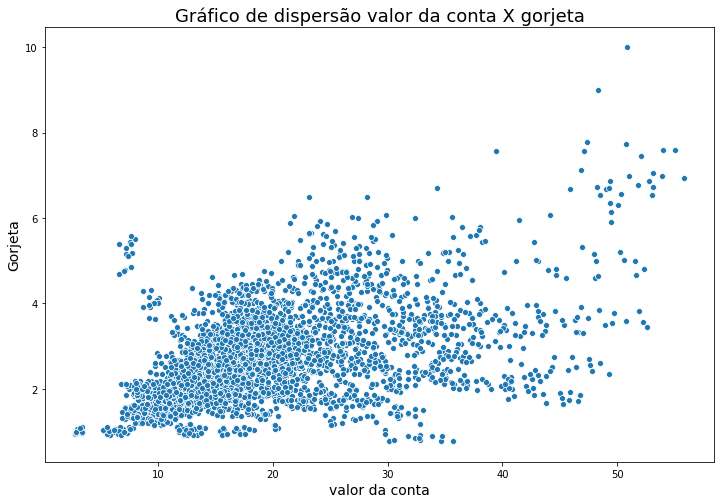

In [9]:
ax = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=restaurante)
ax.figure.set_size_inches(12,8)
ax.set_title('Gráfico de dispersão valor da conta X gorjeta', fontsize=18)
ax.set_xlabel('valor da conta', fontsize=14)
ax.set_ylabel('Gorjeta', fontsize=14)
ax

Escolhi como forma de visualização o Gráfico de Dispersão, também chamado de Diagrama de Dispersão, este é normalmente utilizado para verificar a relação de causa e efeito entre duas variáveis quantitativas (também há outra forma mostrada mais a frente no notebook). Dito isso, parece que conforme o valor da conta aumenta, a gorjeta também aumenta, mas nada comprovativo. 

## Criando nova coluna com porcentagem da gorjeta

In [10]:
restaurante['porcentagem_gorjeta'] = (restaurante.gorjeta / restaurante.valor_da_conta).round(2)
restaurante.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora_do_dia,total_de_pessoas,porcentagem_gorjeta
0,16.99,1.01,Não,Dom,Jantar,2,0.06
1,10.34,1.66,Não,Dom,Jantar,3,0.16
2,21.01,3.50,Não,Dom,Jantar,3,0.17
3,23.68,3.31,Não,Dom,Jantar,2,0.14
4,24.59,3.61,Não,Dom,Jantar,4,0.15


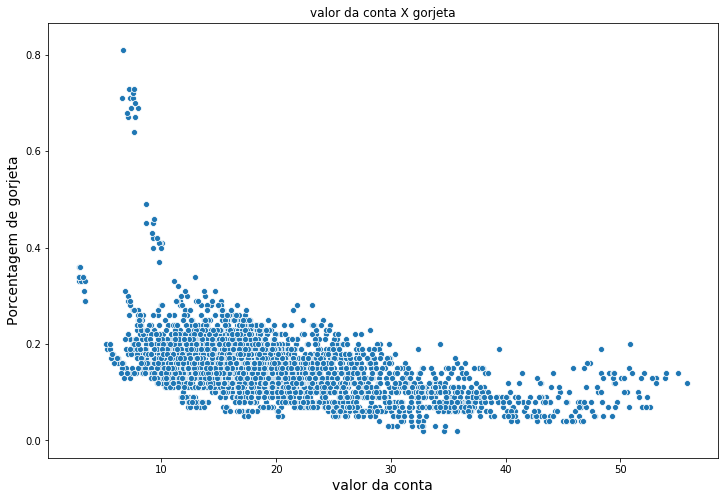

In [11]:
ax = sns.scatterplot(x='valor_da_conta', y='porcentagem_gorjeta', data=restaurante)
ax.figure.set_size_inches(12,8)
ax.set_title('valor da conta X gorjeta')
ax.set_xlabel('valor da conta', fontsize=14)
ax.set_ylabel('Porcentagem de gorjeta', fontsize=14)
ax
ax

Visualizando o gráfico, parece que quanto maior o valor da conta, menor a porcentagem da gorjeta e que o valor da conta não é diretamente nem inversamente proporcional ao valor da gorjeta


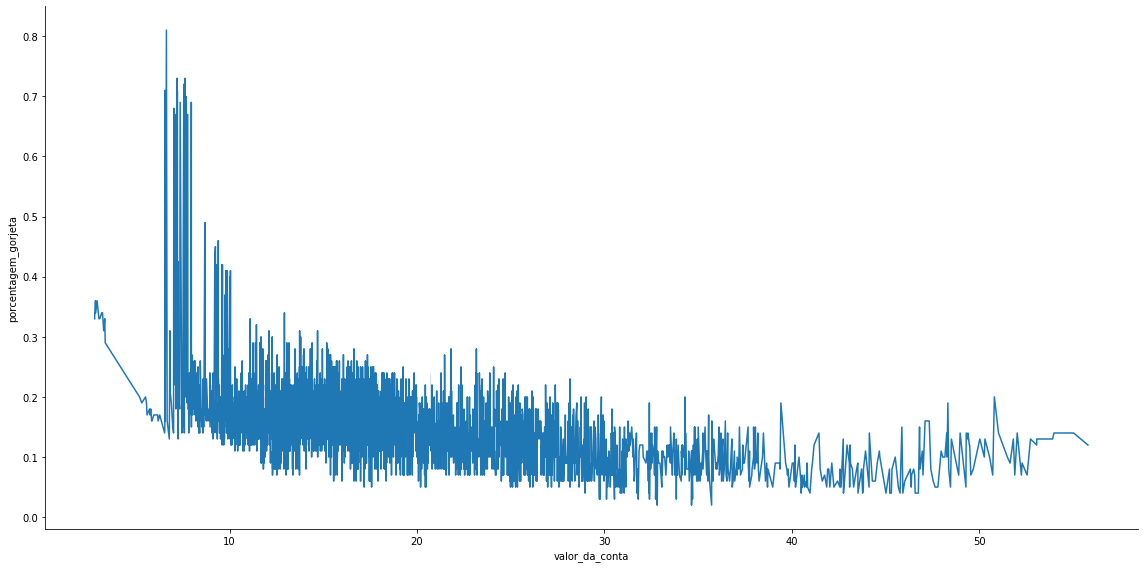

In [12]:
sns.relplot(x='valor_da_conta', y='porcentagem_gorjeta', data=restaurante,
            kind='line', height=8, aspect=2) #mudando a visualização para entender melhor 

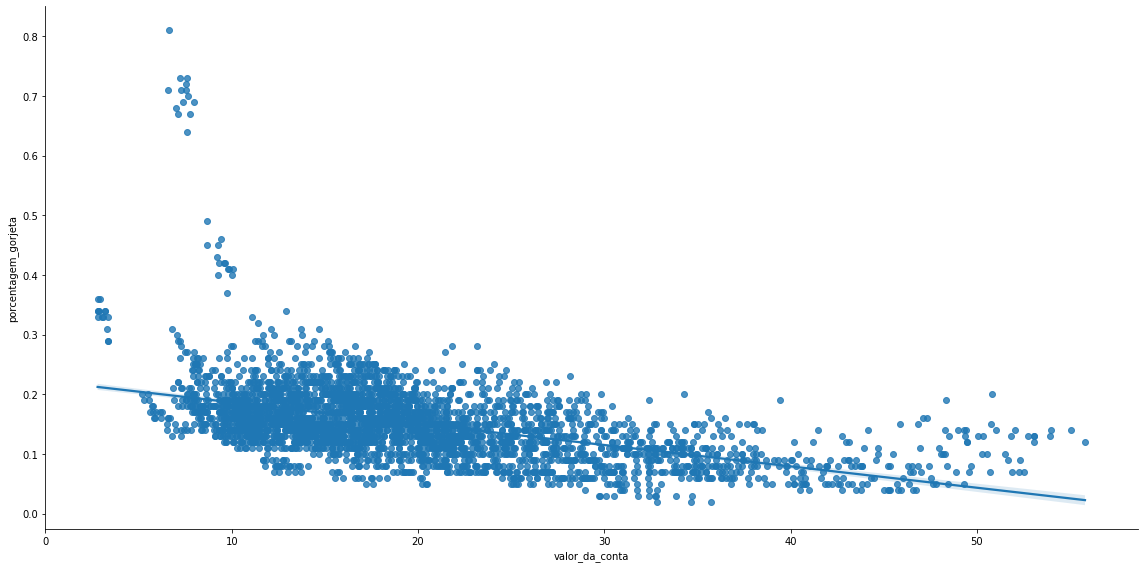

In [13]:
ax = sns.lmplot(x='valor_da_conta', y='porcentagem_gorjeta', data=restaurante, 
                height=8, aspect=2) #obtendo linha de tendência

# Análise 2 - Sobremesa

In [14]:
restaurante[restaurante.sobremesa=='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem_gorjeta
count,1302.000000,1302.000000,1302.000000,1302.000000
mean,20.800076,2.710137,2.408602,0.153425
std,9.901358,1.162280,0.806690,0.088961
min,2.799644,0.766203,1.000000,0.020000
25%,13.495501,1.911661,2.000000,0.090000
50%,17.917059,2.434354,2.000000,0.150000
75%,26.807493,3.326298,3.000000,0.190000
max,55.804318,10.000000,5.000000,0.810000


In [15]:
restaurante[restaurante.sobremesa=='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem_gorjeta
count,2114.000000,2114.000000,2114.000000,2114.000000
mean,19.223436,2.711837,2.668874,0.150033
std,8.316030,1.024271,1.014848,0.044248
min,6.533329,0.910509,1.000000,0.040000
25%,13.281977,1.931135,2.000000,0.120000
50%,17.736923,2.608222,2.000000,0.150000
75%,22.749482,3.284578,3.000000,0.180000
max,53.091371,9.000000,6.000000,0.330000


Os dados de quem pede e quem não pede sobremesa são bem semelhantes, o que se destaca é a diferença no mínimo de valor de conta, onde mostra que quando o cliente não pede sobremesa esse valor é maior e o desvio-padrão da porcentagem da gorjeta que mostra que essa estatística, quando o cliente pede a sobremesa, é maior que o dobro do desvio de quando o cliente não pede.

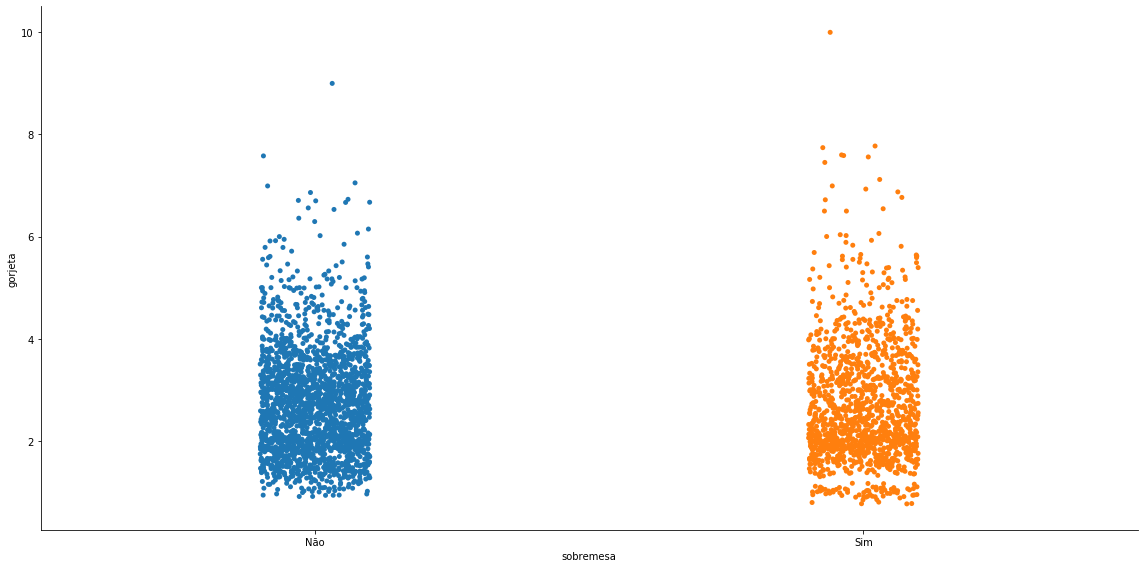

In [16]:
ax = sns.catplot(x='sobremesa', y='gorjeta', data=restaurante,
                 height=8, aspect=2) #mostrando diferença de variáveis categóricas

Gráficos de dispersão também são úteis para variáveis categóricas com essa, aqui podemos verificar a diferença de quantidade de dados, qual grupo tem os dados mais dispersos (o que indica um desvio-padrão maior) e a diferença entre os valores, nesse caso, da gorjeta em relação a quem pede e a quem não pede sobremesa

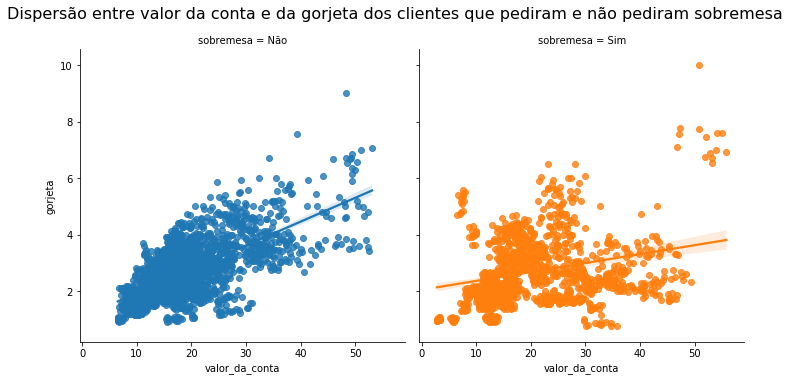

In [17]:
ax=sns.lmplot(x='valor_da_conta', y='gorjeta', data=restaurante, hue='sobremesa', col='sobremesa')
ax.fig.suptitle('Dispersão entre valor da conta e da gorjeta dos clientes que pediram e não pediram sobremesa', fontsize=16, y=1.05)
ax

A linha de tendência nos norteia melhor, evidenciando o aumento, diminuição ou mostrando se os dados se mantém constantes. Nessa caso, a gorjeta dos clientes que não pedem sobremesa aumenta de acordo com o valor da conta, então, quando os clientes pedem, também aumenta mas o crescimento é menor em relação ao primeiro grupo.

# Teste de hipótese 

Um teste de hipótese é uma ferramenta estatística usada para ajudar na tomada de decisão. Para obter esse teste é necessário formular duas hipóteses, chamadas hipótese nula e alternativa, onde a nula é a afirmação que está sendo testada enquanto que a alternativa é a declaração que você quer ser capaz de concluir que é verdadeira. Através deste teste você pode afirmar ou rejeitar, com base em evidências fornecidas pelos dados da amostra, se uma ou outra alegação é verdadeira para a população.
Este é um termo mais profundo que se faz necessário de conhecimento de outros termos estatísticos para entende-lo em sua totalidade, mas <a href="https://www.voitto.com.br/blog/artigo/teste-de-hipotese">aqui</a> você tem uma introdução mais bem documentada sobre o assunto.


H<sup>nula</sup> = A distribuição da taxa de gorjeta é a mesma entre os que pediram sobremesa e que não pediram

H<sup>alt</sup> =A distribuição da taxa de gorjeta não é a mesma entre os que pediram sobremesa e que não pediram

In [18]:
sobremesa = restaurante.query('sobremesa=="Sim"').porcentagem_gorjeta
sem_sobremesa = restaurante.query('sobremesa=="Não"').porcentagem_gorjeta

In [19]:
_,pvalue = ranksums(sobremesa, sem_sobremesa)

In [20]:
print('''Como o o valor do p-value é {:.4f} e é menor que 0.05, então temos evidências o suficiente para rejeitarmos a hipótese
nula. Logo, a distribuição entre os dois grupos é estatisticamente diferente'''.format(pvalue))

Como o o valor do p-value é 0.0331 e é menor que 0.05, então temos evidências o suficiente para rejeitarmos a hipótese
nula. Logo, a distribuição entre os dois grupos é estatisticamente diferente


# Análise 3 - Dias da Semana

In [21]:
restaurante.dia.unique()

array(['Dom', 'Sab', 'Qui', 'Sex'], dtype=object)

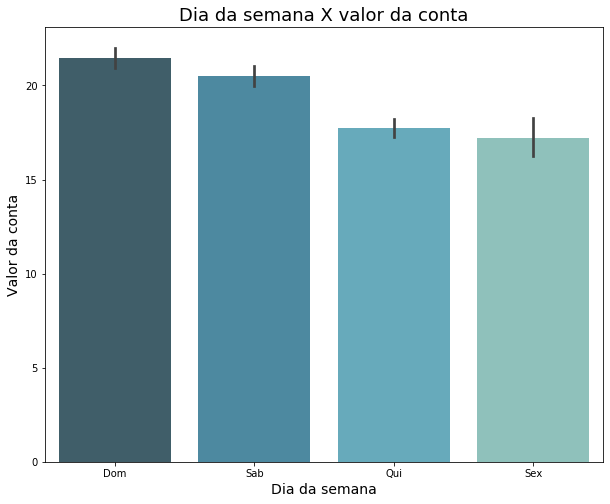

In [22]:
ax = sns.barplot(x='dia', y='valor_da_conta', data=restaurante, palette='GnBu_d')
ax.figure.set_size_inches(10,8)
ax.set_title('Dia da semana X valor da conta', fontsize=18)
ax.set_xlabel('Dia da semana', fontsize=14)
ax.set_ylabel('Valor da conta', fontsize=14)
ax

Visualmente, se nota que domingo é o dia que os clientes tem o maior valor da conta, por outro lado, sexta é o dia que os mesmos tem o menor valor da conta. 

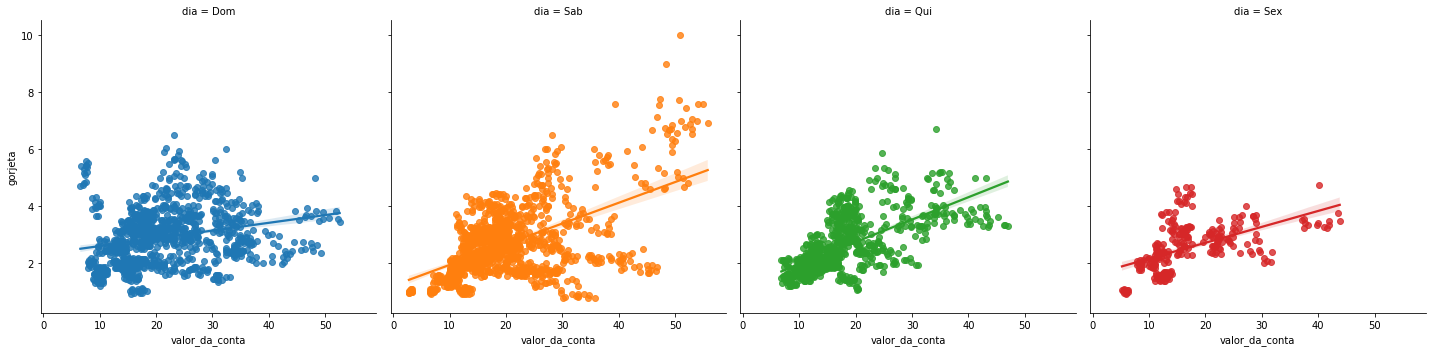

In [23]:
sns.lmplot(x='valor_da_conta', y='gorjeta',
            hue='dia', data=restaurante, col='dia')

Foi feita outra visualização afim de observar a relação entre o valor da conta e o valor da gorjeta dada pelos clientes em cada dia da semana. É notório que quanto maior o valor da conta, maior é a gorjeta, independente do dia da semana (é bom observar também que o crescimento é diferente entre os dias). Além de que se identifica que há mais dados(clientes) no sábado e menos na sexta-feira, confirmando a visualização anterior

In [24]:
media_gorjeta = restaurante.gorjeta.mean()
print('A média geral das gorjetas é de {:.2f}'.format(media_gorjeta))

A média geral das gorjetas é de 2.71


In [25]:
restaurante.groupby(['dia']).mean()[['valor_da_conta','gorjeta','porcentagem_gorjeta']] #média dos valores das colunas selecionadas por dia 

,valor_da_conta,gorjeta,porcentagem_gorjeta
dia,,,
Dom,21.439133,2.902079,0.154953
Qui,17.724088,2.556177,0.154090
Sab,20.480249,2.690114,0.143604
Sex,17.215616,2.549960,0.163158


In [26]:
print('Frequência dos dias')
restaurante.dia.value_counts()

Frequência dos dias


Sab    1218
Dom    1064
Qui     868
Sex     266
Name: dia, dtype: int64

# Teste de hipótese

H<sup>nula</sup> = A distribuição do valor da conta é igual no sábado e no domingo<br>
H<sup>alt</sup> = A distribuição do valor da conta é não é igual no sábado e no domingo

In [27]:
valor_conta_dom = restaurante.query('dia == "Dom"').valor_da_conta #selecionando uma Series dos valores da conta do domingo 
valor_conta_sab = restaurante.query('dia == "Sab"').valor_da_conta #fazendo mesmo procedimento para o sábado

In [28]:
_,pvalue = ranksums(valor_conta_dom,valor_conta_sab)

In [29]:
print('''Como o p-value é {:.4f} e é menor do que 0.05, temos evidências o suficiente para rejeitarmos a hipótese nula.
Logo, a distribuição do valor da conta é estatisticamente diferente no sábado e no domingo'''.format(pvalue))

Como o p-value é 0.0004 e é menor do que 0.05, temos evidências o suficiente para rejeitarmos a hipótese nula.
Logo, a distribuição do valor da conta é estatisticamente diferente no sábado e no domingo


# Análise 4 - Hora do dia 

In [30]:
restaurante.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

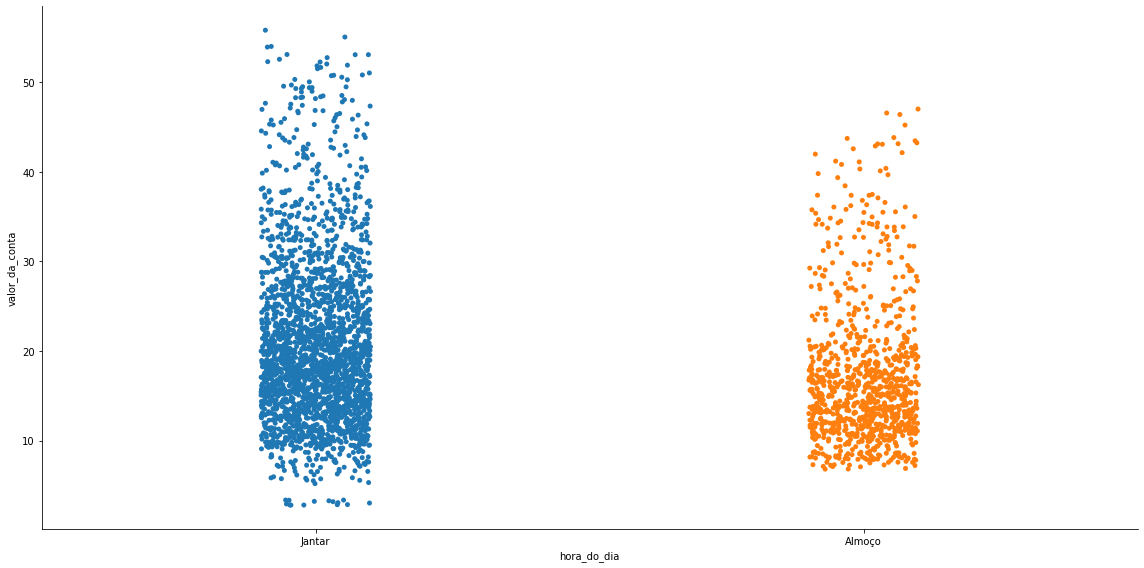

In [31]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=restaurante,
            height=8, aspect=2)

Notória diferença entre o valor da conta de jantar e almoço, mostrando que no jantar o valor da conta é maior

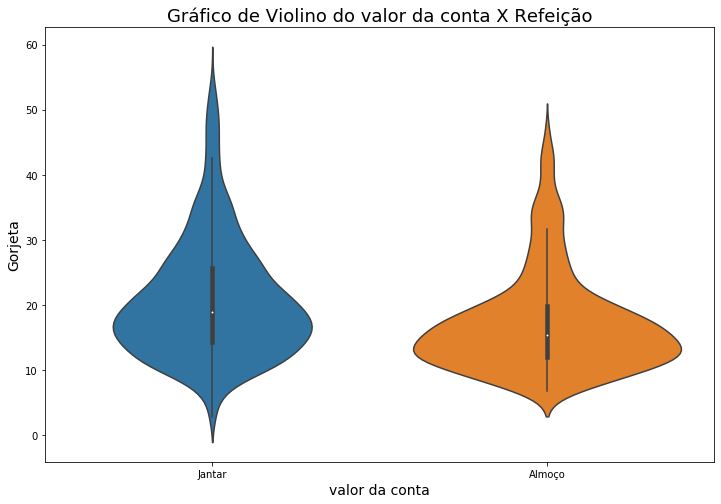

In [32]:
ax = sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=restaurante)
ax.figure.set_size_inches(12,8)
ax.set_title('Gráfico de Violino do valor da conta X Refeição', fontsize=18)
ax.set_xlabel('valor da conta', fontsize=14)
ax.set_ylabel('Gorjeta', fontsize=14)
ax

O Gráfico de Violino tem por objetivo visualizar a distribuição dos dados e evidenciar sua densidade, ou seja, os dados mais comuns. A partir disso, percebe-se que os valores da conta mais comuns são mais altos e mais bem distribuidos no jantar em relação ao almoço.

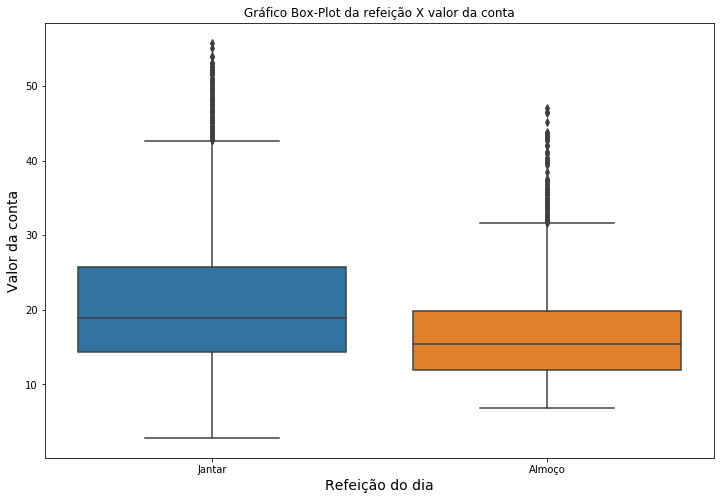

In [33]:
ax = sns.boxplot(x='hora_do_dia',y='valor_da_conta',data=restaurante)
ax.figure.set_size_inches(12,8)
ax.set_title('Gráfico Box-Plot da refeição X valor da conta')
ax.set_xlabel('Refeição do dia', fontsize=14)
ax.set_ylabel('Valor da conta', fontsize=14)
ax

O Gráfico Box-Plot dispõe a quem vê de diversas informações, são elas: O limite superior e inferior dos dados, a mediana(2° quartil), 1° e 3° quartil e Outliers. Neste gráfico podemos ver que a mediana do valor da conta no jantar está mais próximo do 3 quartil do almoço, confirmando a diferença entre os grupos, nota-se também pelo limite inferior e superior que os dados do jantar são mais dispersos. Caso não entenda a interpretação do gráfico, <a href="https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review">aqui</a> tem um boa explicação.


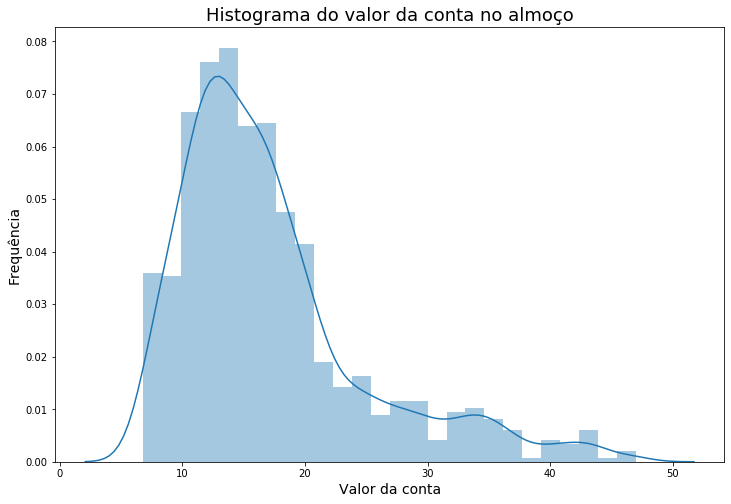

In [34]:
almoço = restaurante.query('hora_do_dia=="Almoço"').valor_da_conta

ax = sns.distplot(almoço)
ax.figure.set_size_inches(12,8)
ax.set_title('Histograma do valor da conta no almoço', fontsize=18)
ax.set_xlabel('Valor da conta', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)
ax

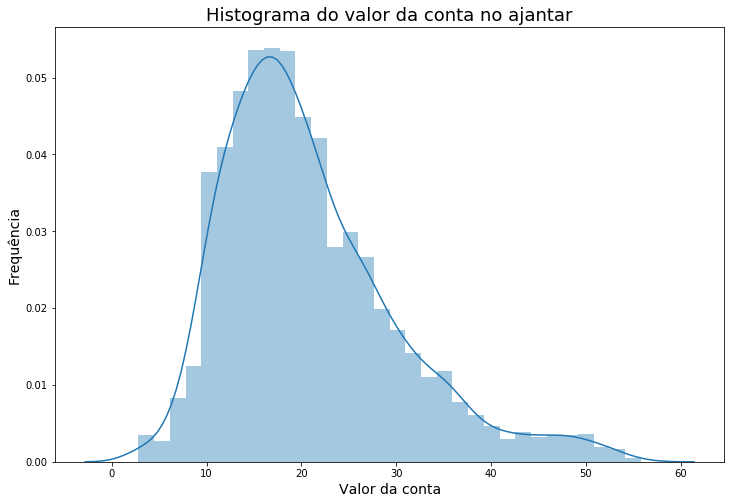

In [35]:
jantar = restaurante.query('hora_do_dia=="Jantar"').valor_da_conta

ax = sns.distplot(jantar)
ax.figure.set_size_inches(12,8)
ax.set_title('Histograma do valor da conta no ajantar', fontsize=18)
ax.set_xlabel('Valor da conta', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)
ax

Foi apresentado acima o Histograma, que nada mais é, que mostra a frequência dos dados dentro de um intervalo contínuo ou período de tempo. Analisando os histogramas, se mostram semelhantes com os valores de conta mais frequentes entre 10 e 20.

In [36]:
restaurante.groupby(['hora_do_dia']).mean()[['valor_da_conta','gorjeta','porcentagem_gorjeta']]

,valor_da_conta,gorjeta,porcentagem_gorjeta
hora_do_dia,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


Apesar do valor da conta do jantar ser mais alta, a média da  porcentagem de gorjeta é menor em relação ao almoço. Isso acontece pois como eu mostro a seguir, o desvio padrão do valor da conta do jantar é maior e consequetemente o da porcentagem de gorjeta também. Então irei testar estatisticamente para verificar se essa diferença da amostra que tenho trazem evidências que apoiam ou não alguma hipótese.

In [37]:
restaurante.groupby(['hora_do_dia']).std()[['valor_da_conta','gorjeta','porcentagem_gorjeta']]

,valor_da_conta,gorjeta,porcentagem_gorjeta
hora_do_dia,,,
Almoço,7.767156,0.928157,0.045777
Jantar,9.218549,1.124391,0.070945


# Teste de hipótese
H<sup>nula</sup> = A distribuição do valor da conta é a mesma entre o jantar e o almoço

H<sup>alt</sup> = A distribuição do valor da conta não é a mesma entre o jantar e o almoço

In [38]:
ranksums(jantar,almoço)
print('''Como o p-value é  {:.4f} e é menor que 0.05, então temos evidências o suficiente para rejeitarmos a hipótese nula,
ou seja, o valor da conta entre janta e almoço não é a mesma'''.format(pvalue))

Como o p-value é  0.0004 e é menor que 0.05, então temos evidências o suficiente para rejeitarmos a hipótese nula,
ou seja, o valor da conta entre janta e almoço não é a mesma


# Conclusão

A partir desse estudo, utilizei de diversas ferramentas de visualização com o Seaborn, alguns tratamentos do DataFrame com pandas e análises estatístcas com o Scipy, este é um notebook introdutório com conteúdo sobre o curso Data Visualization: Explorando com Seaborn da Alura. Espero que tenha contribuido para seu ensino e qualquer dúvida ou crítica, só me adicionar no <a href="https://www.linkedin.com/in/juliohenri">LinkedIn</a>. Valeu!